In [1]:
pip install --upgrade diffusers transformers -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pathlib import Path
import tqdm
import torch
import pandas as pd
import numpy as np
from diffusers import StableDiffusionPipeline
from transformers import pipeline, set_seed
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import cv2

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import torch
import numpy as np
from PIL import Image
# from transformers import StableDiffusionPipeline

In [4]:
class CFG:
    device = "cuda"
    seed = 42
    generator = torch.Generator(device).manual_seed(seed)
    image_gen_steps = 35
    image_gen_model_id = "stabilityai/stable-diffusion-2"
    image_gen_size = (340, 600)
    image_gen_guidance_scale = 9
    prompt_gen_model_id = "gpt2"
    prompt_dataset_size = 6
    prompt_max_length = 12
    bottom_region_height = 200

In [5]:
# def calculate_average_color(image):
#     # Convert PIL Image to NumPy array
#     image_array = np.array(image)
    
#     # Calculate average color
#     average_color = np.mean(image_array, axis=(0, 1))
    
#     return average_color.astype(int)

In [6]:
image_gen_model = StableDiffusionPipeline.from_pretrained(
    CFG.image_gen_model_id, torch_dtype=torch.float16,
    revision="fp16", use_auth_token='your_hugging_face_auth_token', guidance_scale=9
)
image_gen_model = image_gen_model.to(CFG.device)

model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/diffusers/pipelines/pipeline_utils.py:263: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-2 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
unet/diffusion_pytorch_model.safetensors not found


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/815 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/900 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/681M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/602 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

Keyword arguments {'guidance_scale': 9} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [7]:

def generate_image(prompt, model):
    image = model(
        prompt, num_inference_steps=CFG.image_gen_steps,
        generator=CFG.generator,
        guidance_scale=CFG.image_gen_guidance_scale
    ).images[0]

    # Extract the color of the specified pixel region
    bottom_color = np.array(image.crop((0, CFG.bottom_region_height - 1, image.width, CFG.bottom_region_height + 2)))

    # Generate the color for the bottom region
    bottom_region_color = np.full((CFG.bottom_region_height, CFG.image_gen_size[0], 3), bottom_color[0, 0, :], dtype=np.uint8)

    # Resize the colored bottom region to match the width of the original image
    bottom_region_color = Image.fromarray(bottom_region_color).resize((image.width, CFG.bottom_region_height))

    # Combine the original image and the colored bottom region
    image_array = np.concatenate([np.array(image), np.array(bottom_region_color)], axis=0)

    # Convert NumPy array back to PIL Image
    image = Image.fromarray(image_array)

    # Resize the image
    image = image.resize(CFG.image_gen_size)
    return image

In [8]:
company_name = 'NIKE'
product_name = 'Sneakers/Shoes'
product_details = "A permium shoe making company which has it's brand involved in all sports and fitness."
theme_name = 'Black'

In [9]:
prompt = "generate a poster template which has multiple images for an advertisement premium sports shoe production company 'Nike' which has a curved tickmark as it's logo without any text in the whole generated image. The template should be versatile for customization, focusing solely on visual elements without any text"

  0%|          | 0/35 [00:00<?, ?it/s]

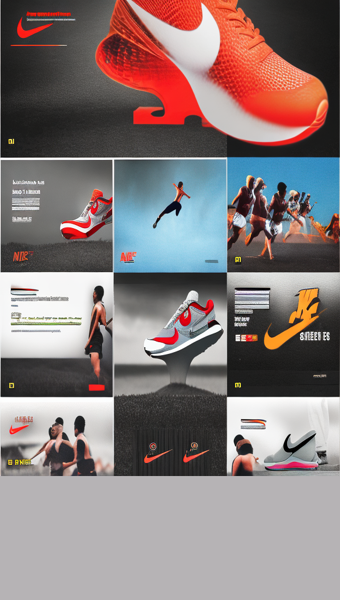

In [10]:
x = generate_image(prompt, image_gen_model)
x

In [ ]:
x.save("/kaggle/working/generated_image.png")

In [ ]:
company_name = 'APPLE'
product_name = 'IPhone'
product_details = "A very permium mobile phone."
theme_name = 'Black'

In [ ]:
prompt1 = f"Create a high-quality image for an advertisement showcasing {company_name}'s {product_name}. The product details include that it is {product_details}. The theme of the ad should be {theme_name}."

In [ ]:
y = generate_image(prompt1, image_gen_model)
y

In [ ]:
y.save(/kag)

In [ ]:
company_name = 'AXE'
product_name = 'AXE 360'
product_details = "A very permium perfume."
theme_name = 'Black'

In [ ]:
prompt2 = f"Create a high-quality image for an advertisement showcasing {company_name}'s {product_name}. The product details include that it is {product_details}. The theme of the ad should be {theme_name}."

In [ ]:
z = generate_image(prompt2, image_gen_model)
z

In [ ]:
prompt3 = "Create a visually stunning and captivating advertisement for Axe's premium perfume. The perfume is exceptionally luxurious, and the theme should be centered around the color black. Design it as a sophisticated piece that conveys the elegance and allure of the product."

In [ ]:
z1 = generate_image(prompt3, image_gen_model)
z1

In [ ]:
company_name = 'AXE'
product_name = 'AXE 360'
product_details = "A very permium perfume."
theme_name = 'Black'

In [ ]:
promptaxe = "Create a visually stunning and elegant advertisement for Axe's premium perfume. The product details include it being a very premium perfume. which is white in colour. Set the background to black and mix (blend) the backgrond of the theme accodingly which is completely in dark black colour"

In [ ]:
z12 = generate_image(promptaxe, image_gen_model)
z12

In [ ]:
z12.save("/kaggle/working/generated_image.png")

In [ ]:
ad_prompt = "Create an advertisement for Nike's Sneakers. It is a very premium fitness sneakers. The theme should be Black. Design it as an Instagram Post."

In [ ]:
promptx = ad_prompt

In [ ]:
z122 = generate_image(promptx, image_gen_model)
z122

In [ ]:
ad_x = "Create a high-quality image for an advertisement showcasing Nike's Sneakers. The product details include that it is a premium fitness Sneaker. The theme of the ad should be Black."

In [ ]:
promptx = ad_x
z122 = generate_image(promptx, image_gen_model)
z122

In [ ]:
from PIL import Image

# Assuming `product_photo_path` is the path to the user's product photo
product_photo_path = '/kaggle/input/imgdata/nike.png'

# Open the user's product photo
user_product_photo = Image.open(product_photo_path)
user_product_photo

In [ ]:
import time

In [ ]:
# Generate the image using the provided prompt without the product image
for i in range(10):
    prompt_without_product_image = (
        "generate a visually appealing and versatile poster template for an advertisement "
        "for a premium sports shoe production company 'Nike'. The template should prominently feature "
        "a curved tick mark as its logo. Avoid any specific text and product imagery in the entire generated image."
    )

    generated_image = generate_image(prompt_without_product_image, image_gen_model)
    
    generated_image.save(f"/kaggle/working/generated_image{i+1}.png")
    

In [ ]:
generated_image.save("/kaggle/working/generated_image1.png")

In [ ]:
# Resize the user's product photo to match the dimensions of the generated image
user_product_photo = user_product_photo.resize(generated_image.size)

# Overlay the user's product photo on top of the generated image
final_image = Image.blend(user_product_photo, generated_image, alpha=0.5)

# Display or save the final image
final_image
# final_image.save('path/to/save/final_image.jpg')

  Obtaining dependency information for rembg from https://files.pythonhosted.org/packages/55/6e/5a336d1308105fbe2a9738e7b99e79549628e80595d62142c4334e319b67/rembg-2.0.53-py3-none-any.whl.metadata
  Obtaining dependency information for onnxruntime from https://files.pythonhosted.org/packages/7a/cf/6aa8c56fd63f53c2c485921e411269c7b501a2b4e634bd02f226ab2d5d8e/onnxruntime-1.16.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for pymatting from https://files.pythonhosted.org/packages/46/aa/d7ff530c33c654263d8775ceb50a73f636fc65edbdf09e102c47a3be391b/PyMatting-1.1.12-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 85.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.9 MB/s eta 0:00:00


100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 138GB/s]


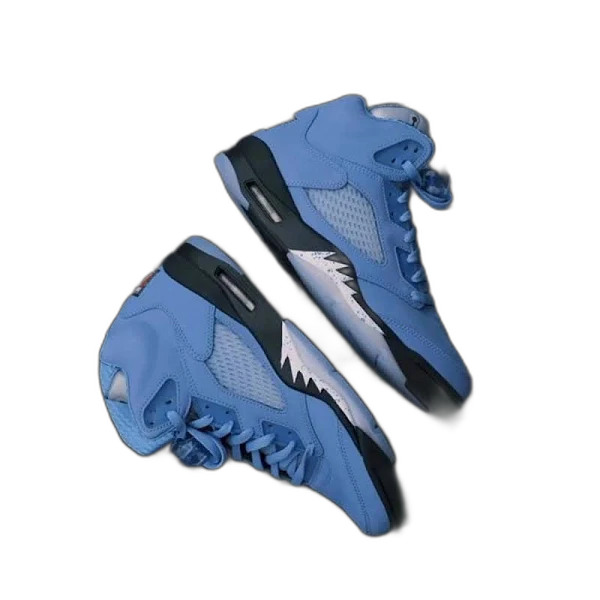

In [13]:
!pip install rembg
import rembg
from PIL import Image
import io

def remove_background(image_path):
    with open(image_path, "rb") as input_file:
        input_data = input_file.read()

    output_data = rembg.remove(input_data)

    output_image = Image.open(io.BytesIO(output_data))
    return output_image

# Example usage
user_shoe_image_path = '/kaggle/input/imgdata2/nike1.png'
cropped_shoe_image = remove_background(user_shoe_image_path)

# Display the cropped shoe image
cropped_shoe_image

In [14]:
cropped_shoe_image.save("/kaggle/working/cropped_image.png")

/tmp/ipykernel_42/1311532012.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  user_shoe_cropped.thumbnail((300, 1300), Image.ANTIALIAS)  # Adjust the size as needed


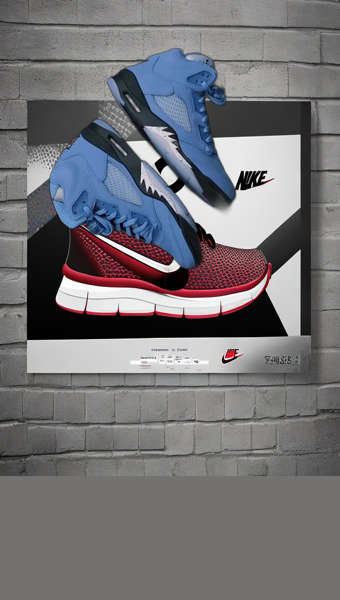

In [15]:
from PIL import Image

# Assuming you already have the generated image and the cropped shoe image
generated_image_path = '/kaggle/input/imgdata3/generated_image9.png'
user_shoe_cropped_path = '/kaggle/working/cropped_image.png'  # Make sure the image has a transparent background

# Open the images
generated_image = Image.open(generated_image_path)
user_shoe_cropped = Image.open(user_shoe_cropped_path)

# Resize the cropped shoe image to fit within the generated image without cropping
user_shoe_cropped.thumbnail((300, 1300), Image.ANTIALIAS)  # Adjust the size as needed

# Determine the position to paste the resized shoe image on the generated image
position = (0, 1)  # Adjust the position as needed

# Composite the images using alpha blending
generated_image.paste(user_shoe_cropped, position, user_shoe_cropped)

# Display or save the final image
generated_image
# generated_image.save('path/to/save/final_image_with_resized_shoe.jpg')

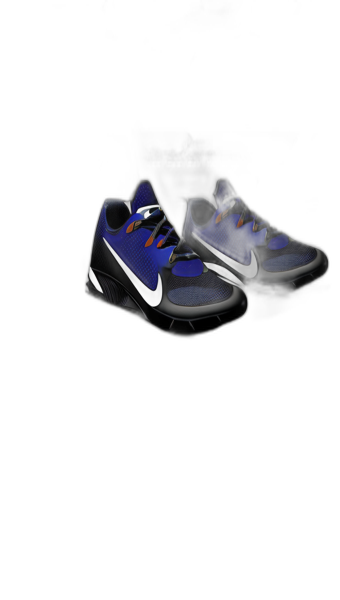

In [16]:
img = "/kaggle/input/imgdata4/generated_image3.png"
x = remove_background(img)
x

In [ ]:
# Individual sets converted to lists
set1 = ['Adidas', 'Classic Runner', 'A timeless sports shoe for all occasions, featuring advanced comfort and durability.', 'Blue and White Classic']
set2 = ['Puma', 'Velocity Boost', 'High-performance sneakers designed for speed and agility, perfect for athletic enthusiasts.', 'Dynamic Red']
set3 = ['Gucci', 'Fashionista Elegance', 'Elevate your style with our fashion-forward footwear, crafted for elegance and comfort.', 'Luxury Gold']
set4 = ['Timberland', 'Adventure Explorer', 'Sturdy and reliable outdoor adventure boots for exploring the wilderness in style.', 'Earth Tones']
set5 = ['Vans', 'Urban Minimalist', 'Sleek and minimalist urban sneakers, combining style and comfort for city dwellers.', 'Monochrome Gray']
set6 = ['Skechers', 'Playful Pals', 'Colorful and playful shoes designed for active kids, ensuring fun and comfort.', 'Rainbow Burst']
set7 = ['Salvatore Ferragamo', 'Italian Elegance', 'Handcrafted luxury leather loafers for a touch of Italian elegance in every step.', 'Sophisticated Brown']
set8 = ['Under Armour', 'TechRun Pro', 'Cutting-edge running shoes with tech-infused features for advanced performance.', 'Futuristic Silver']
set9 = ['Columbia', 'Arctic Explorer', 'Warm and stylish boots designed for winter adventures, keeping you cozy in the snow.', 'Icy Blue']
set10 = ['Converse', 'Street Casual', 'Embrace casual street style with these iconic sneakers, perfect for everyday wear.', 'Urban Black']

# Combine all lists into a single list
all_sets = [set1, set2, set3, set4, set5, set6, set7, set8, set9, set10]

# Display the combined list
print(all_sets)


In [ ]:
# Individual sets converted to lists
set1 = ['Apple', 'iPhone Pro', 'The latest iPhone Pro mobile phone with cutting-edge features and a sleek design.', 'Modern Silver']
set2 = ['Samsung', 'Galaxy Tab S7', 'Experience productivity and entertainment on the Galaxy Tab S7 tablet with a stunning display.', 'Mystic Bronze']
set3 = ['Tesla', 'Model X', 'Introducing the Tesla Model X - the safest, fastest, and most versatile electric SUV.', 'Electric Blue']
set4 = ['Sony', 'Alpha 7R IV', 'Capture high-resolution images with the Sony Alpha 7R IV mirrorless camera.', 'Graphite Black']
set5 = ['Dyson', 'V11 Absolute', 'Effortlessly clean your home with the powerful Dyson V11 Absolute cordless vacuum cleaner.', 'Iron and Fuchsia']
set6 = ['Nintendo', 'Switch Lite', 'Enjoy gaming on the go with the compact and lightweight Nintendo Switch Lite gaming console.', 'Turquoise']
set7 = ['LG', 'OLED C1', 'Immerse yourself in stunning visuals with the LG OLED C1 4K Smart TV.', 'Cinema Gray']
set8 = ['Bose', 'QuietComfort 35 II', 'Experience world-class noise cancellation with the Bose QuietComfort 35 II wireless headphones.', 'Triple Midnight']
set9 = ['Canon', 'EOS 5D Mark IV', 'Unleash your creativity with the Canon EOS 5D Mark IV DSLR camera.', 'Classic Black']
set10 = ['KitchenAid', 'Artisan Stand Mixer', 'Elevate your baking experience with the iconic KitchenAid Artisan Stand Mixer.', 'Empire Red']

# Combine all lists into a single list
all_sets = [set1, set2, set3, set4, set5, set6, set7, set8, set9, set10]

# Display the combined list
print(all_sets)


In [88]:
!pip install rembg
import rembg
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt

def remove_background1(image_path):
    with open(image_path, "rb") as input_file:
        input_data = input_file.read()

    output_data = rembg.remove(input_data)

    output_image = Image.open(io.BytesIO(output_data))
    return output_image

def create_mask_with_coordinates(image_path, output_image):
    # Load the original image
    original_image = Image.open(image_path)
    
    # Convert both images to NumPy arrays
    original_np = np.array(original_image)
    output_np = np.array(output_image)

    # Ensure the output image has an alpha channel
    if output_np.shape[2] == 3:
        output_np = np.concatenate([output_np, np.ones((output_np.shape[0], output_np.shape[1], 1), dtype=output_np.dtype) * 255], axis=-1)

    # Create a mask by finding the pixels that were removed (transparent in the output image)
    mask = (output_np[:, :, 3] != 0)

    # Get the coordinates of the removed region
    removed_coordinates = np.argwhere(mask)

    # Calculate the bounding box of the removed region
    min_y, min_x = np.min(removed_coordinates, axis=0)
    max_y, max_x = np.max(removed_coordinates, axis=0)

    # Calculate the size (length and width) of the removed object
    length = max_y - min_y + 1
    width = max_x - min_x + 1

    # Set the pixels in the original image to be transparent where the object was removed
    original_np[mask] = [0, 0, 0]  # Adjust the values based on the number of channels in the original image

    # Return the masked original image, coordinates, length, and width
    masked_original_image = Image.fromarray(original_np)
    return masked_original_image, removed_coordinates, length, width

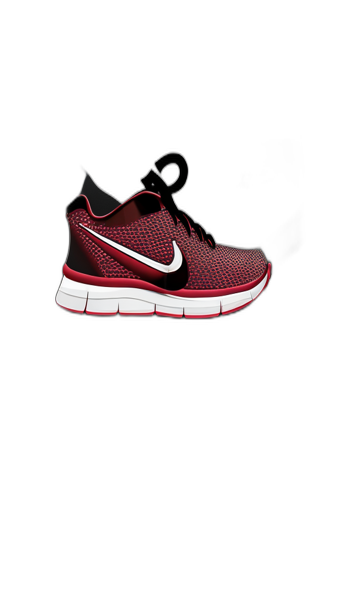

In [89]:
# Example usage
user_shoe_image_path = '/kaggle/input/imgdata4/generated_image9.png'
cropped_shoe_image = remove_background1(user_shoe_image_path)

# Display the cropped shoe image
cropped_shoe_image

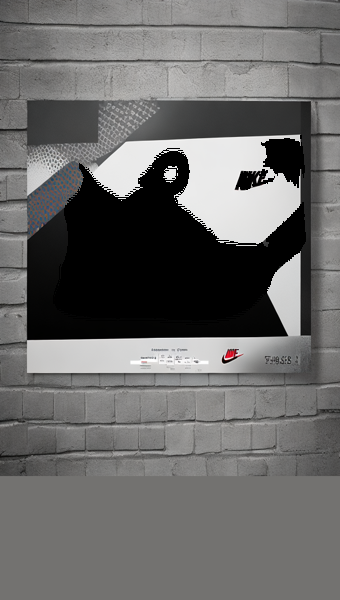

In [90]:
# Create and display the masked original image
masked_generated_image, removed_coordinates , length, width = create_mask_with_coordinates(user_shoe_image_path, cropped_shoe_image)
masked_generated_image

In [91]:
masked_generated_image.save("/kaggle/working/masked_generated_image.png")

In [92]:
removed_coordinates , len(removed_coordinates)

(array([[135, 300],
        [135, 301],
        [136, 300],
        ...,
        [324, 205],
        [324, 206],
        [324, 207]]),
 27117)

In [93]:
length , width

(190, 253)

/tmp/ipykernel_42/336746311.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  user_shoe_cropped.thumbnail((length+100,width+100), Image.ANTIALIAS)  # Adjust the size as needed


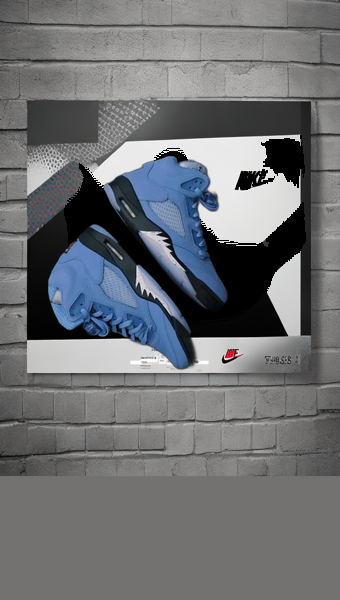

In [117]:
from PIL import Image

# Assuming you already have the generated image and the cropped shoe image
generated_image_path = '/kaggle/working/masked_generated_image.png'
user_shoe_cropped_path = '/kaggle/working/cropped_image.png'  # Make sure the image has a transparent background

# Open the images
generated_image = Image.open(generated_image_path)
user_shoe_cropped = Image.open(user_shoe_cropped_path)

# Resize the cropped shoe image to fit within the generated image without cropping
user_shoe_cropped.thumbnail((length+100,width+100), Image.ANTIALIAS)  # Adjust the size as needed

# Extract the minimum X and Y values from the coordinates
min_x = np.min(removed_coordinates[:, 0])
min_y = np.min(removed_coordinates[:, 1])

# Determine the position to paste the resized shoe image on the generated image
position = (0 ,110)

# Composite the images using alpha blending
generated_image.paste(user_shoe_cropped, position, user_shoe_cropped)

# Display or save the final image
generated_image

In [118]:
generated_image.save("/kaggle/working/final_merged_image.png")

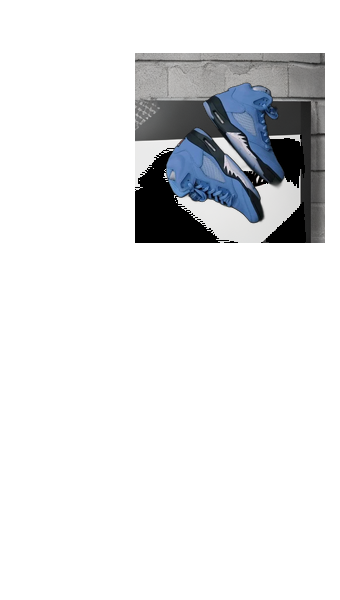

In [96]:
# Create a mask to identify the area where the shoe image will be pasted
mask = Image.new("L", generated_image.size, 0)
mask.paste(255, (position[0], position[1], position[0] + user_shoe_cropped.width, position[1] + user_shoe_cropped.height))

# Paste the resized shoe image onto the generated image using the mask
generated_image.paste(user_shoe_cropped, position, user_shoe_cropped)
generated_image.putalpha(mask)

# Display or save the final image
generated_image
# generated_image.save('path/to/save/final_image_with_resized_shoe.jpg')